In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Data uploading

In [2]:
AIRPORT_ICAO = "ESSA"

CLUSTERS = [1,2,3,4,5,6]

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# WIF
rwy_metrics_WIF_horizontal_PIs_by_hour_df_list = [] # list

# TIF
rwy_metrics_TIF_horizontal_PIs_by_hour_df_list = [] # list

for cluster in CLUSTERS:
    filename = AIRPORT_ICAO + "_metrics_WIF_horizontal_PIs_by_hour_cluster" + str(cluster) + ".csv"
    full_filename = os.path.join(DATA_DIR, filename)
    temp_df = pd.read_csv(full_filename, sep=' ')
    rwy_metrics_WIF_horizontal_PIs_by_hour_df_list.append(temp_df)

    filename = AIRPORT_ICAO + "_metrics_TIF_horizontal_PIs_by_hour_cluster" + str(cluster) + ".csv"
    full_filename = os.path.join(DATA_DIR, filename)
    temp_df = pd.read_csv(full_filename, sep=' ')
    rwy_metrics_TIF_horizontal_PIs_by_hour_df_list.append(temp_df)

# Average Additional Distance

## Medians of Average Additional Distance in TMA vs TIF

0.91
0.86
0.94
0.66
0.77
0.77


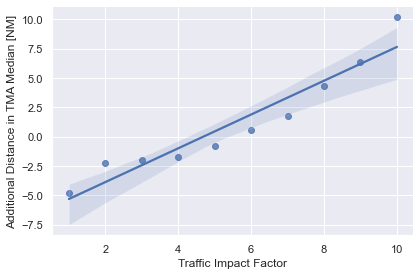

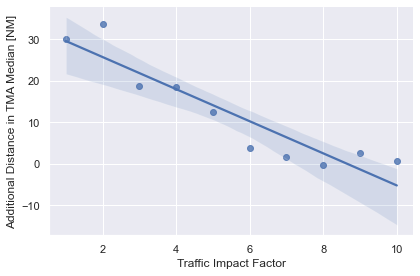

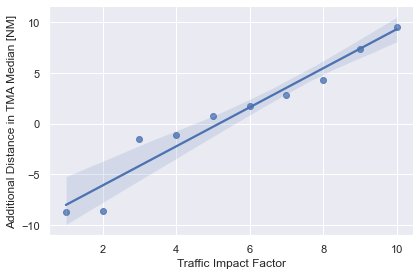

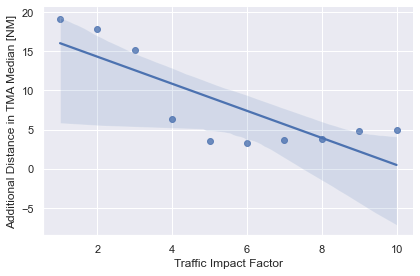

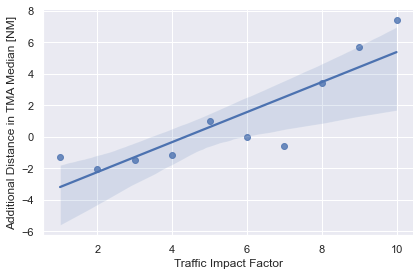

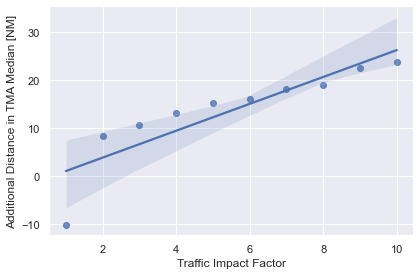

In [4]:
CLUSTERS = [1,2,3,4,5,6]

for cluster in CLUSTERS:
    df = rwy_metrics_TIF_horizontal_PIs_by_hour_df_list[cluster-1].copy()
    df = df[df['numberOfFlights']>0]

    df.set_index(['TIF'], inplace=True)
    df.sort_index(inplace=True)

    median_df = pd.DataFrame(columns=['TIF', 'addDistanceMedian'])

    for idx, group in df.groupby(level='TIF'):
    
        #idx_df = group['distanceChangePercentMean']
        idx_df = group['additionalDistanceMean']
    
        idx_median = np.median(idx_df)
        median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

        median_df['TIF'] = median_df['TIF'].astype(np.float)
        median_df['addDistanceMedian'] = median_df['addDistanceMedian'].astype(np.float)
        
    sns.set(rc={'figure.figsize':(1,1)})

    sns.lmplot(x='TIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
    plt.xlabel('Traffic Impact Factor')
    plt.ylabel('Additional Distance in TMA Median [NM]')
    #plt.ylabel('Additional Distance in TMA Median [%]')
        
    fig_name = "Figures\AddDistanceVsTIFOnlyClusters\AddDistanceVsTIF_cluster" + str(cluster) + ".png"
    #fig_name = "Figures\AddDistancePercentVsTIFOnlyClusters\AddDistancePercentVsTIF_cluster" + str(cluster) + ".png"
    plt.savefig(fig_name)

    #statsmodel:
    X_df = median_df[['TIF']]
    y_df = median_df[['addDistanceMedian']]

    X2 = sm.add_constant(X_df.values)
    est = sm.OLS(y_df, X2)
    est2 = est.fit()
    #print(est2.summary())
    rsquare = est2.rsquared
    #print(f"R-suare is {rsquare:.2f}")
    print(f"{rsquare:.2f}")
    # with outliers - ESGG: 0.84, ESSA: 0.93
    # without outliers - ESGG: 0.86, ESSA: 0.93